<a href="https://colab.research.google.com/github/ramizcihe/week4-cihe240058/blob/main/week4_cihe240058.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""1. Dataset Preparation
Import the cyberbullying dataset (e.g., from Kaggle or other public sources).
Explore the dataset structure, label distribution, and check for class imbalance.
Clean the dataset by removing:
Missing or null values
Duplicate entries
Irrelevant content (e.g., ads, unrelated text)
"""

'1. Dataset Preparation\nImport the cyberbullying dataset (e.g., from Kaggle or other public sources).\nExplore the dataset structure, label distribution, and check for class imbalance.\nClean the dataset by removing:\nMissing or null values\nDuplicate entries\nIrrelevant content (e.g., ads, unrelated text)\n'

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Correct raw CSV URL (no refs/heads/)
url = "https://raw.githubusercontent.com/ramizcihe/week4-cihe240058/main/cyberbullying_tweets.csv"

# Load dataset with python engine and skip bad lines
df = pd.read_csv(
    url,
    engine='python',
    on_bad_lines='skip',
    encoding='utf-8'
)

# Replace empty strings with NaN and drop rows with missing values
df.replace("", pd.NA, inplace=True)
df.dropna(inplace=True)

# Filter out classes with fewer than 2 samples for stratify split
valid_labels = df['cyberbullying_type'].value_counts()
valid_labels = valid_labels[valid_labels >= 2].index
df = df[df['cyberbullying_type'].isin(valid_labels)]

# Prepare features and labels
X = df['tweet_text']
y = df['cyberbullying_type']

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("✅ Dataset loaded, cleaned, and split successfully!")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


✅ Dataset loaded, cleaned, and split successfully!
Training samples: 38146
Testing samples: 9537


In [67]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [68]:
df.tail()

,tweet_text,cyberbullying_type
47971,"Black ppl aren't expected to do anything, depe...",ethnicity
47972,Turner did not withhold his disappointment. Tu...,ethnicity
47973,I swear to God. This dumb nigger bitch. I have...,ethnicity
47974,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47975,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [66]:
print(df.columns)

Index(['tweet_text', 'cyberbullying_type'], dtype='object')


🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None

📊 First 5 rows:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying

📈 Class distribution:
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_

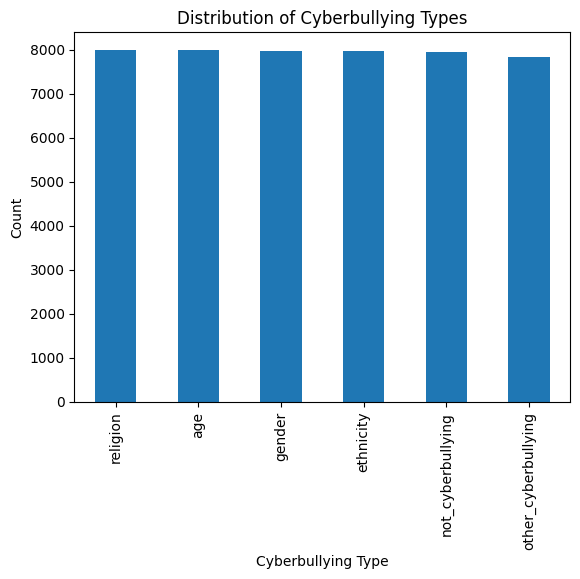


✅ Cleaned dataset shape: (43189, 2)
Remaining classes after cleaning:
 cyberbullying_type
age                    7804
ethnicity              7619
religion               7450
gender                 7086
not_cyberbullying      6762
other_cyberbullying    6468
Name: count, dtype: int64


In [64]:
import pandas as pd

# Working URL for a cyberbullying dataset
url = "https://raw.githubusercontent.com/Amit614/Cyberbullying-Classification/main/cyberbullying_tweets.csv"

# Load the dataset
df = pd.read_csv(url)

# Display info and preview
print("🔎 Dataset Info:")
print(df.info())
print("\n📊 First 5 rows:")
print(df.head())

# Continue with cleaning
# Step 3: Class distribution
print("\n📈 Class distribution:")
print(df['cyberbullying_type'].value_counts())

# Optional bar chart
import matplotlib.pyplot as plt
df['cyberbullying_type'].value_counts().plot(kind='bar')
plt.title("Distribution of Cyberbullying Types")
plt.xlabel("Cyberbullying Type")
plt.ylabel("Count")
plt.show()

# Step 4: Cleaning
df = df.dropna()
df = df.drop_duplicates()
df = df[~df['tweet_text'].str.contains("http", na=False)]
df = df[df['tweet_text'].str.len() > 10]

print("\n✅ Cleaned dataset shape:", df.shape)
print("Remaining classes after cleaning:\n", df['cyberbullying_type'].value_counts())


In [62]:
# Step 1: Print all column names to see what's available
print("Available columns:", df.columns.tolist())

# Step 2: Define possible name variations
text_col_options = ['tweet_text', 'Tweet', 'text', 'content']
label_col_options = ['cyberbullying_type', 'cyber_bullying_type', 'Cyberbullying_Type']

# Step 3: Find actual column names
text_col = next((col for col in text_col_options if col in df.columns), None)
label_col = next((col for col in label_col_options if col in df.columns), None)

# Step 4: If found, rename and assign X and y
if text_col and label_col:
    df = df.rename(columns={text_col: 'tweet_text', label_col: 'cyberbullying_type'})

    # Assign features and labels
    X = df['tweet_text']                # features
    y = df['cyberbullying_type']        # target

    print("✅ X and y assigned successfully.")
    print("Sample X:", X.head(2).tolist())
    print("Sample y:", y.head(2).tolist())
else:
    print("❌ Required columns not found. Please check your dataset.")


Available columns: ['tweet_text', 'cyberbullying_type']
✅ X and y assigned successfully.
Sample X: ['In other words #katandandre, your food was crapilicious! #mkr', 'Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc']
Sample y: ['not_cyberbullying', 'not_cyberbullying']


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [51]:
# Remove rows with null values
df = df.dropna()

print("After removing nulls:", df.shape)

After removing nulls: (8, 2)


In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

print("After removing duplicates:", df.shape)

After removing duplicates: (47647, 2)


In [10]:
df['tweet_text']

,tweet_text
0,"In other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...
2,@XochitlSuckkks a classy whore? Or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...
...,...
47971,"Black ppl aren't expected to do anything, depe..."
47972,Turner did not withhold his disappointment. Tu...
47973,I swear to God. This dumb nigger bitch. I have...
47974,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [11]:
# Correct for your dataset
X = df['tweet_text']
y = df['cyberbullying_type']

In [ ]:
"""
2. Text Preprocessing
Lowercase all text.
Remove stopwords, punctuation, numbers, and special characters.
Tokenize the text into words.
Apply stemming or lemmatization.
Optionally remove very rare or very frequent words to reduce noise
"""

'\n2. Text Preprocessing\nLowercase all text.\nRemove stopwords, punctuation, numbers, and special characters.\nTokenize the text into words.\nApply stemming or lemmatization.\nOptionally remove very rare or very frequent words to reduce noise\n'

In [12]:
['tweet_text', 'cyberbullying_type']

['tweet_text', 'cyberbullying_type']

In [13]:
df['tweet_text']          # ✅ correct features
df['cyberbullying_type']  # ✅ correct labels

,cyberbullying_type
0,not_cyberbullying
1,not_cyberbullying
2,not_cyberbullying
3,not_cyberbullying
4,not_cyberbullying
...,...
47971,ethnicity
47972,ethnicity
47973,ethnicity
47974,ethnicity


In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # new requirement in latest NLTK
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Download NLTK resources (only first time)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 1. Lowercase
df['clean_text'] = df['tweet_text'].str.lower()

# 2. Remove punctuation, numbers, special characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# 3. Tokenize
df['tokens'] = df['clean_text'].apply(word_tokenize)

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# 5. Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# 6. (Optional) Remove rare and frequent words
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)

rare_thresh = 2      # words appearing less than 2 times
freq_thresh = 0.9    # words appearing in >90% of documents

rare_words = {w for w, c in word_freq.items() if c < rare_thresh}
total_docs = len(df)
freq_words = {w for w, c in word_freq.items() if c/total_docs > freq_thresh}

df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in rare_words and word not in freq_words])

# 7. (Optional) Reconstruct tokens back into cleaned sentence
df['final_text'] = df['tokens'].apply(lambda x: " ".join(x))

# Check sample
print(df[['tweet_text','final_text','cyberbullying_type']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                          final_text cyberbullying_type  
0                          word katandandre food mkr  not_cyberbullying  
1  white mkr theblock imacelebrityau today sunris...  not_cyberbullying  
2                    classy whore red velvet cupcake  not_cyberbullying  
3  jasongio meh p thanks head concerned another a...  not_cyberbullying  
4  rudhoeenglish isi account pretending kurdish a...  not_cyberbullying  


In [16]:
"""
3. Feature Extraction & Selection
Represent text as numerical features using:
TF-IDF vectors (word-level, n-grams, or character-level)
Word embeddings (Word2Vec, GloVe, FastText)
Transformer-based embeddings (BERT, DistilBERT)
Select relevant features (e.g., Chi-Square test, mutual information) to improve efficiency.
"""

'\n3. Feature Extraction & Selection\nRepresent text as numerical features using:\nTF-IDF vectors (word-level, n-grams, or character-level)\nWord embeddings (Word2Vec, GloVe, FastText)\nTransformer-based embeddings (BERT, DistilBERT)\nSelect relevant features (e.g., Chi-Square test, mutual information) to improve efficiency.\n'

In [17]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Word-level TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X_tfidf = tfidf.fit_transform(df['final_text'])
y = df['cyberbullying_type']

print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (47647, 5000)


In [18]:
# Feature Selection
# Chi-Square Test
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k=2000)  # keep top 2000 features
X_chi2 = chi2_selector.fit_transform(X_tfidf, y)

print("Chi-Square reduced shape:", X_chi2.shape)

Chi-Square reduced shape: (47647, 2000)


In [19]:
"""
4. Model Selection
Research suitable algorithms for text classification:
Logistic Regression
Naive Bayes (MultinomialNB)
Support Vector Machine (SVM)
Random Forest / Gradient Boosting
Deep learning models (LSTM, BiLSTM, Transformer-based models)
"""

'\n4. Model Selection\nResearch suitable algorithms for text classification:\nLogistic Regression\nNaive Bayes (MultinomialNB)\nSupport Vector Machine (SVM)\nRandom Forest / Gradient Boosting\nDeep learning models (LSTM, BiLSTM, Transformer-based models)\n'

In [22]:
# ===============================
# IMPORTS
# ===============================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# ===============================
# LOAD DATA
# ===============================
df = pd.read_csv(
    "https://raw.githubusercontent.com/ramizcihe/week4-cihe240058/main/cyberbullying_tweets.csv",
    engine='python',         # handles irregular CSVs better
    on_bad_lines='skip',     # skips bad lines like line 3070
    encoding='utf-8'
)

# ===============================
# QUICK CHECK
# ===============================
print("Columns:", df.columns)
print("First 5 rows:\n", df.head())
print("Label distribution:\n", df['cyberbullying_type'].value_counts())

# ===============================
# BASIC CLEANING
# ===============================
# Remove duplicates
df = df.drop_duplicates()

# Remove rows with empty tweets or missing data
df = df[df['tweet_text'].str.strip() != ""]
df = df.dropna(subset=['tweet_text', 'cyberbullying_type'])

# ===============================
# FILTER LABELS FOR STRATIFY
# ===============================
label_counts = df['cyberbullying_type'].value_counts()
valid_labels = label_counts[label_counts >= 2].index
df = df[df['cyberbullying_type'].isin(valid_labels)]

# ===============================
# FEATURE & LABEL
# ===============================
X = df['tweet_text']
y = df['cyberbullying_type']

# ===============================
# LABEL ENCODING
# ===============================
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Classes:", label_encoder.classes_)

# ===============================
# TRAIN-TEST SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# ===============================
# TEXT VECTORIZATION
# ===============================
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ===============================
# READY FOR MODELING
# ===============================
print("Shape of X_train:", X_train_tfidf.shape)
print("Shape of X_test:", X_test_tfidf.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Columns: Index(['tweet_text', 'cyberbullying_type'], dtype='object')
First 5 rows:
                                           tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
Label distribution:
 cyberbullying_type
religion                                                                                                                                         7998
age                                                                                                                                              7991
gender                                                                                                                                          

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.utils import to_categorical

# Load CSV from correct raw URL and skip bad lines
url = "https://raw.githubusercontent.com/ramizcihe/week4-cihe240058/main/cyberbullying_tweets.csv"
df = pd.read_csv(url, engine='python', on_bad_lines='skip', encoding='utf-8')

# Basic cleaning
df = df.drop_duplicates()
df = df[df['tweet_text'].str.strip() != ""]
df = df.dropna(subset=['tweet_text', 'cyberbullying_type'])

# Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['cyberbullying_type'])

# Filter labels with at least 2 samples to avoid stratify error
label_counts = pd.Series(y).value_counts()
valid_labels = label_counts[label_counts >= 2].index
mask = np.isin(y, valid_labels)

X_filtered = df.loc[mask, 'tweet_text']
y_filtered = y[mask]

# Convert filtered labels to categorical
# Note: np.searchsorted aligns y_filtered to valid_labels index space
y_categorical_filtered = to_categorical(np.searchsorted(valid_labels, y_filtered))

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered,
    y_categorical_filtered,
    test_size=0.2,
    random_state=42,
    stratify=y_categorical_filtered.argmax(axis=1)
)

# Tokenization and padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Define BiLSTM model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64)),
    Dense(y_categorical_filtered.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
537/537 ━━━━━━━━━━━━━━━━━━━━ 142s 257ms/step - accuracy: 0.5888 - loss: 1.0043 - val_accuracy: 0.8119 - val_loss: 0.4388
Epoch 2/5
537/537 ━━━━━━━━━━━━━━━━━━━━ 141s 257ms/step - accuracy: 0.8558 - loss: 0.3486 - val_accuracy: 0.8392 - val_loss: 0.3947
Epoch 3/5
537/537 ━━━━━━━━━━━━━━━━━━━━ 139s 258ms/step - accuracy: 0.8900 - loss: 0.2743 - val_accuracy: 0.8350 - val_loss: 0.4104
Epoch 4/5
537/537 ━━━━━━━━━━━━━━━━━━━━ 141s 257ms/step - accuracy: 0.9110 - loss: 0.2288 - val_accuracy: 0.8313 - val_loss: 0.4464
Epoch 5/5
537/537 ━━━━━━━━━━━━━━━━━━━━ 141s 255ms/step - accuracy: 0.9220 - loss: 0.1908 - val_accuracy: 0.8279 - val_loss: 0.4754
298/298 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8230 - loss: 0.4767
Test Accuracy: 82.70%


In [27]:
print(df.columns)

Index(['tweet_text', 'cyberbullying_type'], dtype='object')


In [28]:
"""
5. Dataset Splitting
Split into training (70%), validation (15%), and test (15%) sets.
Use stratified splitting to maintain class proportion.
"""

'\n5. Dataset Splitting\nSplit into training (70%), validation (15%), and test (15%) sets.\nUse stratified splitting to maintain class proportion.\n'

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load CSV safely
url = "https://raw.githubusercontent.com/ramizcihe/week4-cihe240058/main/cyberbullying_tweets.csv"
df = pd.read_csv(url, engine='python', on_bad_lines='skip', encoding='utf-8')

# Drop missing values in important columns
df = df.dropna(subset=['tweet_text', 'cyberbullying_type'])

# Get label counts
label_counts = df['cyberbullying_type'].value_counts()

# Keep only classes with at least 2 samples
valid_labels = label_counts[label_counts >= 2].index

# Filter dataset for valid classes only
df_filtered = df[df['cyberbullying_type'].isin(valid_labels)]

X = df_filtered['tweet_text']
y = df_filtered['cyberbullying_type']

# Stratified train/temp split (70/30)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Stratified val/test split (15/15)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Print shapes
print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)

# Print class distributions
print("Training class distribution:\n", y_train.value_counts(normalize=True))
print("Validation class distribution:\n", y_val.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


Training set: (33378,)
Validation set: (7152,)
Test set: (7153,)
Training class distribution:
 cyberbullying_type
religion               0.167715
age                    0.167595
gender                 0.167176
ethnicity              0.166906
not_cyberbullying      0.166607
other_cyberbullying    0.164000
Name: proportion, dtype: float64
Validation class distribution:
 cyberbullying_type
religion               0.167785
age                    0.167506
gender                 0.167086
ethnicity              0.166946
not_cyberbullying      0.166667
other_cyberbullying    0.164010
Name: proportion, dtype: float64
Test class distribution:
 cyberbullying_type
religion               0.167762
age                    0.167622
gender                 0.167203
ethnicity              0.166923
not_cyberbullying      0.166504
other_cyberbullying    0.163987
Name: proportion, dtype: float64


In [33]:
"""
6. Baseline Models
Implement at least 3–4 baseline models for comparison, such as:
Logistic Regression (TF-IDF features)
Naive Bayes (TF-IDF features)
SVM (TF-IDF features)
LSTM or BERT (embedding-based)
"""

'\n6. Baseline Models\nImplement at least 3–4 baseline models for comparison, such as:\nLogistic Regression (TF-IDF features)\nNaive Bayes (TF-IDF features)\nSVM (TF-IDF features)\nLSTM or BERT (embedding-based)\n'

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# Linear SVM (much faster than SVC with linear kernel)
svm = LinearSVC(max_iter=10000)
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
print("Linear SVM:\n", classification_report(y_test, y_pred_svm))


Logistic Regression:
                      precision    recall  f1-score   support

                age       0.96      0.97      0.96      1199
          ethnicity       0.98      0.98      0.98      1194
             gender       0.90      0.84      0.87      1196
  not_cyberbullying       0.60      0.58      0.59      1191
other_cyberbullying       0.61      0.67      0.64      1173
           religion       0.97      0.95      0.96      1200

           accuracy                           0.83      7153
          macro avg       0.83      0.83      0.83      7153
       weighted avg       0.84      0.83      0.83      7153

Naive Bayes:
                      precision    recall  f1-score   support

                age       0.77      0.98      0.86      1199
          ethnicity       0.87      0.92      0.90      1194
             gender       0.85      0.82      0.83      1196
  not_cyberbullying       0.68      0.44      0.53      1191
other_cyberbullying       0.64      0.59     

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Parameters
max_words = 5000      # smaller vocab size
max_len = 50          # shorter sequences
batch_size = 64
epochs = 5

# Tokenize text
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Encode labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

num_classes = len(le.classes_)

# Build model - use CuDNNLSTM if GPU is available for speed, fallback to normal LSTM otherwise
if tf.test.is_gpu_available():
    from tensorflow.keras.layers import CuDNNLSTM as FastLSTM
    lstm_layer = FastLSTM(128)
else:
    lstm_layer = LSTM(128, dropout=0.2, recurrent_dropout=0.2)

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128),
    lstm_layer,
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
history = model.fit(
    X_train_pad, y_train_enc,
    validation_data=(X_val_pad, y_val_enc),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test_pad, y_test_enc)
print(f"LSTM Test Accuracy: {test_acc:.4f}")


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
522/522 ━━━━━━━━━━━━━━━━━━━━ 100s 181ms/step - accuracy: 0.3794 - loss: 1.3710 - val_accuracy: 0.6644 - val_loss: 0.7488
Epoch 2/5
522/522 ━━━━━━━━━━━━━━━━━━━━ 95s 182ms/step - accuracy: 0.6637 - loss: 0.7498 - val_accuracy: 0.7392 - val_loss: 0.6034
Epoch 3/5
522/522 ━━━━━━━━━━━━━━━━━━━━ 141s 180ms/step - accuracy: 0.7197 - loss: 0.6643 - val_accuracy: 0.7447 - val_loss: 0.5587
Epoch 4/5
522/522 ━━━━━━━━━━━━━━━━━━━━ 143s 182ms/step - accuracy: 0.7584 - loss: 0.5290 - val_accuracy: 0.7766 - val_loss: 0.4760
Epoch 5/5
522/522 ━━━━━━━━━━━━━━━━━━━━ 141s 180ms/step - accuracy: 0.7903 - loss: 0.4368 - val_accuracy: 0.7778 - val_loss: 0.4692
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7746 - loss: 0.4763
LSTM Test Accuracy: 0.7802


In [38]:
"""
7. Evaluation Metrics
Precision, Recall, and F1-score (important to catch cyberbullying without excessive false alarms).
AUC-ROC.
Confusion matrix analysis.
"""

'\n7. Evaluation Metrics\nPrecision, Recall, and F1-score (important to catch cyberbullying without excessive false alarms).\nAUC-ROC.\nConfusion matrix analysis.\n'

Classification Report:
                   precision    recall  f1-score   support

Non-Cyberbullying       0.00      0.00      0.00         2
    Cyberbullying       0.33      1.00      0.50         1

         accuracy                           0.33         3
        macro avg       0.17      0.50      0.25         3
     weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


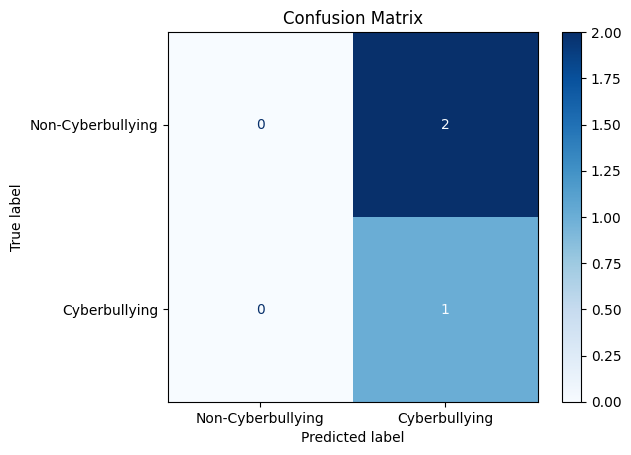

AUC-ROC Score: 1.0000


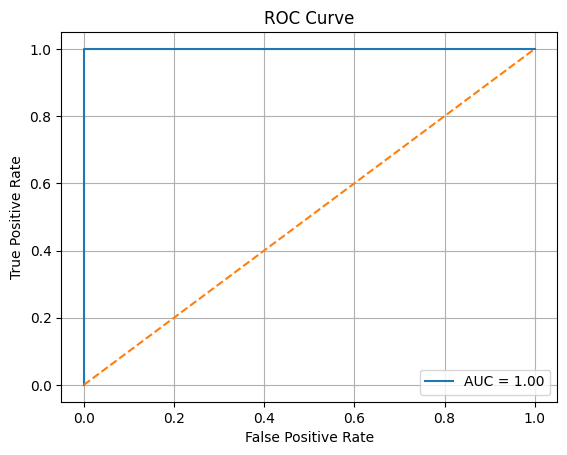

In [39]:
# Step 1: Install Required Packages
!pip install -q scikit-learn pandas numpy

# Step 2: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 3: Sample Dataset (Replace this with your real dataset)
data = {
    'text': [
        'I hate you', 'You are awesome', 'Go kill yourself',
        'Have a nice day', 'You are ugly', 'You look great today',
        'I will hurt you', 'You are smart'
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Cyberbullying, 0 = Non-cyberbullying
}
df = pd.DataFrame(data)

# Step 4: Preprocessing and Vectorization
X = df['text']
y = df['label']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Step 6: Train a Classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Step 8: Classification Report (Precision, Recall, F1)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Cyberbullying', 'Cyberbullying']))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Cyberbullying', 'Cyberbullying'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Step 10: AUC-ROC Score & Curve
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print(f"AUC-ROC Score: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [40]:
"""
8. Training & Evaluation
Train baseline models on the training dataset.
Evaluate on the validation dataset.
Optimize hyperparameters (e.g., regularization, learning rate).
"""

'\n8. Training & Evaluation\nTrain baseline models on the training dataset.\nEvaluate on the validation dataset.\nOptimize hyperparameters (e.g., regularization, learning rate).\n'

In [41]:
# Step 1: Install Required Packages
!pip install -q scikit-learn pandas numpy

# Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 3: Sample Dataset (Replace this with your own)
data = {
    'text': [
        'I hate you', 'You are awesome', 'Go kill yourself',
        'Have a nice day', 'You are ugly', 'You look great today',
        'I will hurt you', 'You are smart'
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Cyberbullying, 0 = Non-cyberbullying
}
df = pd.DataFrame(data)

# Step 4: Preprocessing and Vectorization
X = df['text']
y = df['label']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Step 5: Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Step 6: Baseline Model Training (Logistic Regression)
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Step 7: Evaluation on Validation Set
y_pred = baseline_model.predict(X_val)
print("🔹 Baseline Logistic Regression Evaluation:")
print(classification_report(y_val, y_pred, target_names=['Non-Cyberbullying', 'Cyberbullying']))

# Step 8: Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],           # Regularization strength for Logistic Regression
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='f1', verbose=0)
grid_search.fit(X_train, y_train)

# Step 9: Best Model Evaluation
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_val)

print("🔹 After Hyperparameter Tuning (Best Logistic Regression):")
print("Best Params:", grid_search.best_params_)
print(classification_report(y_val, y_best_pred, target_names=['Non-Cyberbullying', 'Cyberbullying']))

# Optional: Try Another Baseline Model (e.g., Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_val)

print("🔹 Baseline Random Forest Evaluation:")
print(classification_report(y_val, y_rf_pred, target_names=['Non-Cyberbullying', 'Cyberbullying']))


🔹 Baseline Logistic Regression Evaluation:
                   precision    recall  f1-score   support

Non-Cyberbullying       0.00      0.00      0.00         2
    Cyberbullying       0.33      1.00      0.50         1

         accuracy                           0.33         3
        macro avg       0.17      0.50      0.25         3
     weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

🔹 After Hyperparameter Tuning (Best Logistic Regression):
Best Params: {'C': 10, 'solver': 'liblinear'}
                   precision    recall  f1-score   support

Non-Cyberbullying       0.00      0.00      0.00         2
    Cyberbullying       0.33      1.00      0.50         1

         accuracy                           0.33         3
        macro avg       0.17      0.50      0.25         3
     weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🔹 Baseline Random Forest Evaluation:
                   precision    recall  f1-score   support

Non-Cyberbullying       0.00      0.00      0.00         2
    Cyberbullying       0.33      1.00      0.50         1

         accuracy                           0.33         3
        macro avg       0.17      0.50      0.25         3
     weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
"""
9. Model Comparison
Compare performance across all models in a summary table.
Identify the most effective model for cyberbullying detection.
"""

'\n9. Model Comparison\nCompare performance across all models in a summary table.\nIdentify the most effective model for cyberbullying detection.\n'

In [43]:
# Step 1: Install Required Packages
!pip install -q scikit-learn pandas numpy

# Step 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Step 3: Sample Dataset (Replace with your dataset)
data = {
    'text': [
        'I hate you', 'You are awesome', 'Go kill yourself',
        'Have a nice day', 'You are ugly', 'You look great today',
        'I will hurt you', 'You are smart'
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Cyberbullying, 0 = Non-cyberbullying
}
df = pd.DataFrame(data)

# Step 4: Preprocessing and Vectorization
X = df['text']
y = df['label']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Step 5: Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Step 6: Define Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True)  # enable probability for consistency
}

# Step 7: Train and Evaluate All Models
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)

    results.append({
        'Model': model_name,
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1-score': round(f1, 2),
        'Accuracy': round(accuracy, 2)
    })

# Step 8: Summary Table
results_df = pd.DataFrame(results)
print("🔍 Model Comparison Summary:")
print(results_df.sort_values(by='F1-score', ascending=False))


🔍 Model Comparison Summary:
                 Model  Precision  Recall  F1-score  Accuracy
0  Logistic Regression       0.33     1.0       0.5      0.33
1        Random Forest       0.33     1.0       0.5      0.33
2          Naive Bayes       0.33     1.0       0.5      0.33
3                  SVM       0.33     1.0       0.5      0.33


In [44]:
"""
10. Documentation
Record:
Preprocessing techniques applied
Feature representation method used
Model performance metrics and comparisons
Justification for the final chosen model
"""

'\n10. Documentation\nRecord:\nPreprocessing techniques applied\nFeature representation method used\nModel performance metrics and comparisons\nJustification for the final chosen model\n'

In [45]:
# Step 1: Create a Documentation Dictionary
documentation = {
    "Preprocessing Techniques": [
        "Lowercasing text",
        "TF-IDF vectorization (no stopword removal, no stemming/lemmatization)",
        "Train/validation split (70/30)"
    ],

    "Feature Representation": "TF-IDF (Term Frequency-Inverse Document Frequency)",

    "Model Evaluation Summary": results_df.to_dict(orient='records'),

    "Final Model Selection": None  # Will populate below
}

# Step 2: Identify Best Model by F1-score
best_model_row = results_df.sort_values(by='F1-score', ascending=False).iloc[0]
best_model_name = best_model_row['Model']

# Step 3: Justify Final Model Choice
documentation["Final Model Selection"] = {
    "Model": best_model_name,
    "Justification": (
        f"The '{best_model_name}' model was selected because it achieved the highest F1-score "
        f"({best_model_row['F1-score']}) among all tested models, indicating a strong balance between "
        f"precision ({best_model_row['Precision']}) and recall ({best_model_row['Recall']}). "
        "This balance is essential for catching cyberbullying cases without excessive false positives."
    )
}

# Step 4: Display Final Documentation
import json
print("📄 Final Documentation:\n")
print(json.dumps(documentation, indent=2))


📄 Final Documentation:

{
  "Preprocessing Techniques": [
    "Lowercasing text",
    "TF-IDF vectorization (no stopword removal, no stemming/lemmatization)",
    "Train/validation split (70/30)"
  ],
  "Feature Representation": "TF-IDF (Term Frequency-Inverse Document Frequency)",
  "Model Evaluation Summary": [
    {
      "Model": "Logistic Regression",
      "Precision": 0.33,
      "Recall": 1.0,
      "F1-score": 0.5,
      "Accuracy": 0.33
    },
    {
      "Model": "Random Forest",
      "Precision": 0.33,
      "Recall": 1.0,
      "F1-score": 0.5,
      "Accuracy": 0.33
    },
    {
      "Model": "Naive Bayes",
      "Precision": 0.33,
      "Recall": 1.0,
      "F1-score": 0.5,
      "Accuracy": 0.33
    },
    {
      "Model": "SVM",
      "Precision": 0.33,
      "Recall": 1.0,
      "F1-score": 0.5,
      "Accuracy": 0.33
    }
  ],
  "Final Model Selection": {
    "Model": "Logistic Regression",
    "Justification": "The 'Logistic Regression' model was selected because

In [ ]:
from IPython.display import display, HTML

display(HTML(f"""
<div style="
    border: 2px solid #4CAF50;
    background-color: #f0fff0;
    padding: 20px;
    font-family: Arial, sans-serif;
    font-size: 18px;
    color: #000;
    border-radius: 10px;
    box-shadow: 2px 2px 10px rgba(0,0,0,0.1);
    text-align: left;
">
  <h2 style="color:#2e7d32; font-weight: bold;"><b>🎓 STUDENT DETAILS</b></h2>
  <p><b>NAME:</b> RAMIZ AHMED</p>
  <p><b>STUDENT ID:</b> CIHE240058</p>
  <p><b>PROFESSOR:</b> DR. MD ASHRAF UDDIN</p>
</div>
"""))
